In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from desilike.likelihoods.supernovae import PantheonPlusSHOESSNLikelihood, PantheonPlusSNLikelihood, PantheonSNLikelihood

In [3]:
from desilike.theories import Cosmoprimo
cosmo = Cosmoprimo(engine='camb')

## Set priors
cosmo.init.params = {'Omega_m': {'prior': {'limits': [0.1, 0.9]},
                          'ref': {'dist': 'norm', 'loc': 0.3, 'scale': 0.002},
                          'latex': '\Omega_m'},
                     'H0': {'prior': {'limits': [20, 100]},
                          'ref': {'dist': 'norm', 'loc': 67, 'scale': 0.5},
                          'latex': 'H_0'}
                     }

<>:7: SyntaxWarning: invalid escape sequence '\O'
<>:7: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_18108/1297538579.py:7: SyntaxWarning: invalid escape sequence '\O'
  'latex': '\Omega_m'},


In [4]:
from desilike import setup_logging

setup_logging()  # set up logging

likelihoods = {#'Pantheon': PantheonSNLikelihood(cosmo=cosmo),
            #'Pantheon+': PantheonPlusSNLikelihood(cosmo=cosmo),
            'Pantheon+ & SH0ES': PantheonPlusSHOESSNLikelihood(cosmo=cosmo)}

loglike = likelihoods.get('Pantheon+ & SH0ES').all_params['PantheonPlusSHOESSN.loglikelihood']

print(loglike)

[000000.01] [0/1] 10-25 17:00  PantheonPlusSHOESSNLikelihood INFO     Loading light-curve from /home/lazarolima/.local/data/PantheonPlusSNLikelihood/Pantheon+SH0ES.dat
[000000.05] [0/1] 10-25 17:00  PantheonPlusSHOESSNLikelihood INFO     Loading covariance from /home/lazarolima/.local/data/PantheonPlusSNLikelihood/Pantheon+SH0ES_STAT+SYS.cov
PantheonPlusSHOESSN.loglikelihood


In [5]:
from desilike import setup_logging
from desilike.samplers import ZeusSampler

setup_logging()  # set up logging

likelihoods = {#'Pantheon': PantheonSNLikelihood(cosmo=cosmo),
               #'Pantheon+': PantheonPlusSNLikelihood(cosmo=cosmo),
               'Pantheon+ & SH0ES': PantheonPlusSHOESSNLikelihood(cosmo=cosmo)}
chains = {}
for name, likelihood in likelihoods.items():
    sampler = ZeusSampler(likelihood, save_fn=f'_tests/chain_{name}_*.npy', seed=42)
    sampler.run(check={'max_eigen_gr': 0.03, 'stable_over': 1})
    chains[name] = sampler.chains[0].remove_burnin(0.5)

[000000.01] [0/1] 10-25 17:00  PantheonPlusSHOESSNLikelihood INFO     Loading light-curve from /home/lazarolima/.local/data/PantheonPlusSNLikelihood/Pantheon+SH0ES.dat
[000000.04] [0/1] 10-25 17:00  PantheonPlusSHOESSNLikelihood INFO     Loading covariance from /home/lazarolima/.local/data/PantheonPlusSNLikelihood/Pantheon+SH0ES_STAT+SYS.cov
[000001.17] [0/1] 10-25 17:00  ZeusSampler               INFO     Varied parameters: ['Omega_m', 'H0', 'Mb'].
[000001.86] [0/1] 10-25 17:00  ZeusSampler               INFO     Could *not* vmap input likelihood. Set logging level to debug (setup_logging("debug")) to get full stack trace.
[000001.87] [0/1] 10-25 17:00  ZeusSampler               INFO     Could *not* jit input likelihood.
[000001.98] [0/1] 10-25 17:00  TaskManager               INFO     Entering TaskManager with 1 workers.
[000001.98] [0/1] 10-25 17:00  root                      INFO     Initialising ensemble of 8 walkers...
zeus: Exception while calling your likelihood function:
  par

Traceback (most recent call last):
  File "/home/lazarolima/.local/lib/python3.12/site-packages/zeus/fwrapper.py", line 24, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lazarolima/.local/lib/python3.12/site-packages/desilike-1.0.0-py3.12.egg/desilike/samplers/base.py", line 61, in wrapper
    toret[mask] = func(self, values)
                  ^^^^^^^^^^^^^^^^^^
  File "/home/lazarolima/.local/lib/python3.12/site-packages/desilike-1.0.0-py3.12.egg/desilike/samplers/base.py", line 151, in logposterior
    results = self._vlikelihood(points.to_dict())
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lazarolima/.local/lib/python3.12/site-packages/desilike-1.0.0-py3.12.egg/desilike/samplers/base.py", line 264, in _vlikelihood
    return vlikelihood(*args, **kwargs, mpicomm=self.mpicomm)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lazarolima/.local/lib/python3.12/site-p

KeyboardInterrupt: 

NameError: name 'likelihoods' is not defined

Removed no burn in


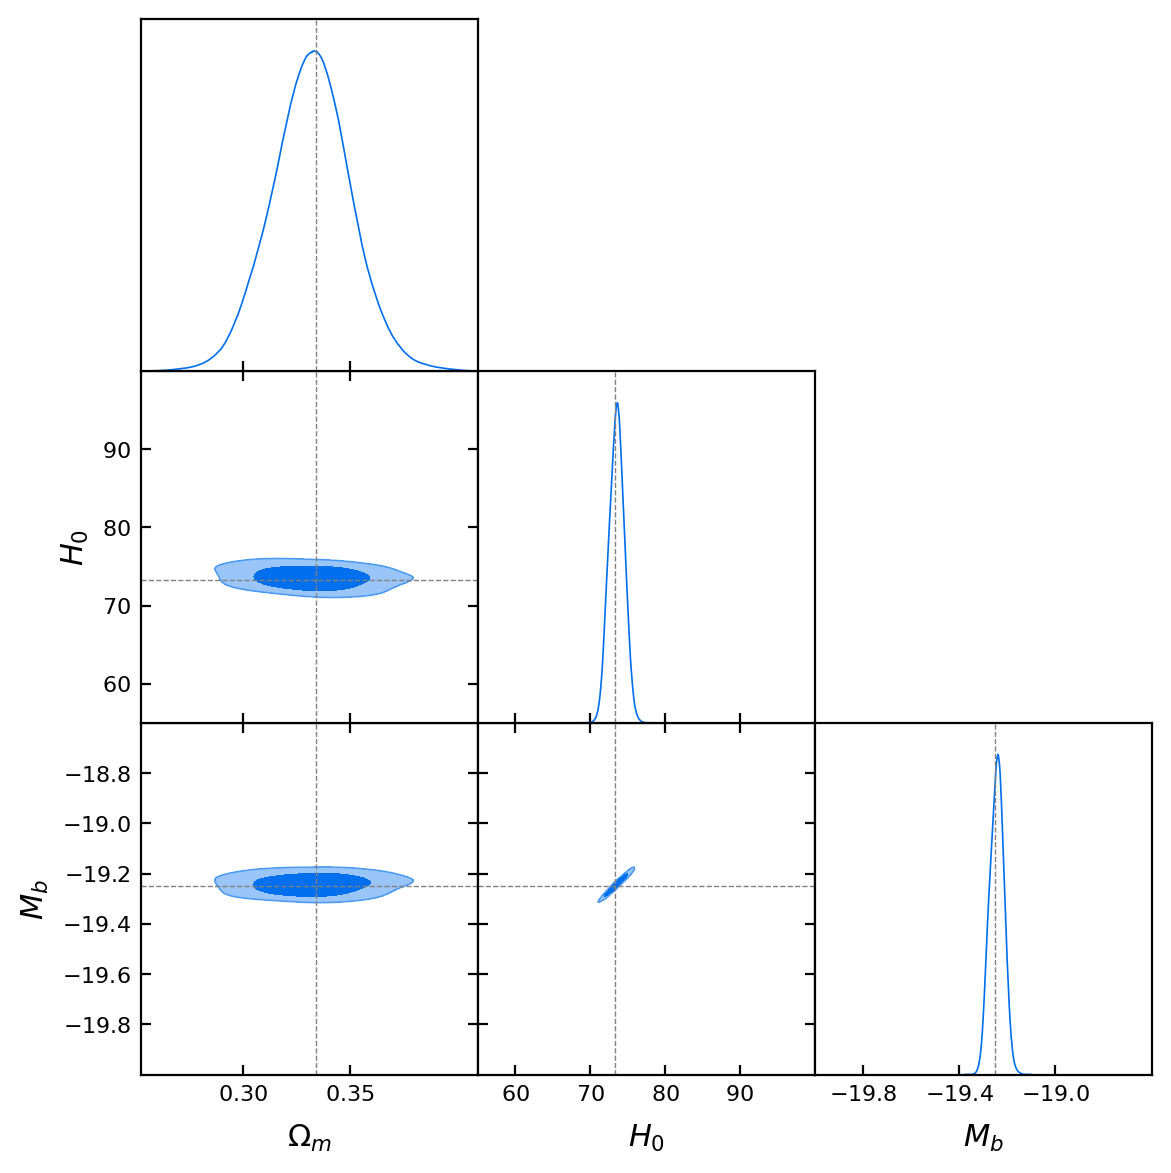

In [5]:
from desilike.samples import plotting

plotting.plot_triangle([chain[::10] for chain in chains.values()], labels=list(chains.keys()),
                       filled=True,
                       param_limits={'H0':[55., 100.],'Mb':[-20., -18.6]},
                       markers={'Mb': -19.25, 'H0': 73.3, 'Omega_m': 0.334},
                       show=True)